## Return values and scope
Learn how to return early from a function, how to return multiple values, and understand how R decides which variables exist.

### Returning early
Sometimes, you don't need to run through the whole body of a function to get the answer. 
In that case you can return early from that function using return().
To check if x is divisible by n, you can use is_divisible_by(x, n) from assertive.
Alternatively, use the modulo operator, %%. x %% n gives the remainder when dividing x by n, 
so x %% n == 0 determines whether x is divisible by n. Try

1:10 %% 3 == 0

To solve this exercise, you need to know that a leap year is every 400th year (like the year 2000) or every 4th year 
that isn't a century (like 1904 but not 1900 or 1905).

In [1]:
# Complete the definition of is_leap_year(), checking for the cases of year being divisible by 400, then 100, then 4, 
# returning early from the function in each case.

is_leap_year <- function(year) {
  # If year is div. by 400 return TRUE
  if(year%%400 == 0) {
    return(TRUE)
  }
  # If year is div. by 100 return FALSE
  if(year%%100 == 0) {
    return(FALSE)
  }  
  # If year is div. by 4 return TRUE
    if(year%%4 == 0) {
    return(TRUE)
  }
  # Otherwise return FALSE
  return(FALSE)
}



[1] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE

### Returning invisibly
When the main purpose of a function is to generate output, like drawing a plot or printing something in the console, 
you may not want a return value to be printed as well. In that case, the value should be invisibly returned.
The base R plot function returns NULL, since its main purpose is to draw a plot. This isn't helpful 
if you want to use it in piped code: instead it should invisibly return the plot data to be piped on to the next step.
Recall that plot() has a formula interface: instead of giving it vectors for x and y, you can specify 
a formula describing which columns of a data frame go on the x and y axes, and a data argument for the data frame. 
Note that just like lm(), the arguments are the wrong way round because the detail argument, formula, 
comes before the data argument.

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



NULL

x,y
0.67369182,0.453860671
0.88058192,0.775424511
0.95254461,0.907341235
0.03789964,0.001436382
0.51311652,0.263288565
0.23963791,0.057426329
0.69255790,0.479636443
0.69493997,0.482941556
0.03068055,0.000941296
0.01515572,0.000229696


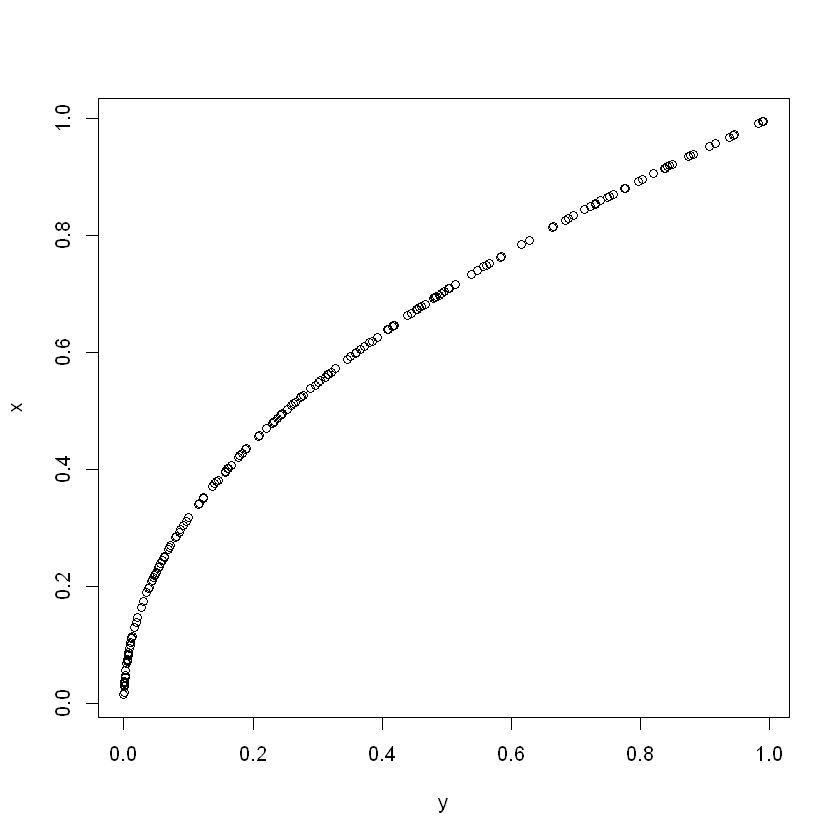

In [7]:
library(dplyr)

square = read.csv("x_square.csv")
# Using x_square, plot x vs y
plt_x_vs_y <- plot(x ~ y, data = square)

# Oh no! The plot object is NULL
plt_x_vs_y

# Define a pipeable plot fn with data and formula args
pipeable_plot <- function(data, formula) {
  # Call plot() with the formula interface
  plot(formula, data)
  # Invisibly return the input dataset
  invisible(data)
}

# Draw the scatter plot of dist vs. speed again
plt_x_vs_y <- square %>% 
  pipeable_plot(x ~ y)

# Now the plot object has a value
plt_x_vs_y

### Returning metadata
Sometimes you want the return multiple things from a function, but you want the result to have 
a particular class (for example, a data frame or a numeric vector), so returning a list isn't appropriate. 
This is common when you have a result plus metadata about the result. (Metadata is "data about the data". 
For example, it could be the file a dataset was loaded from, or the username of the person who created the variable, 
or the number of iterations for an algorithm to converge.)
In that case, you can store the metadata in attributes. Recall the syntax for assigning attributes is as follows.
attr(object, "attribute_name") <- attribute_value

'data.frame':	184 obs. of  2 variables:
 $ x: num  0.6737 0.8806 0.9525 0.0379 0.5131 ...
 $ y: num  0.45386 0.77542 0.90734 0.00144 0.26329 ...
 - attr(*, "formula")=Class 'formula'  language x ~ y
  .. ..- attr(*, ".Environment")=<environment: 0x0000000005647ec0> 


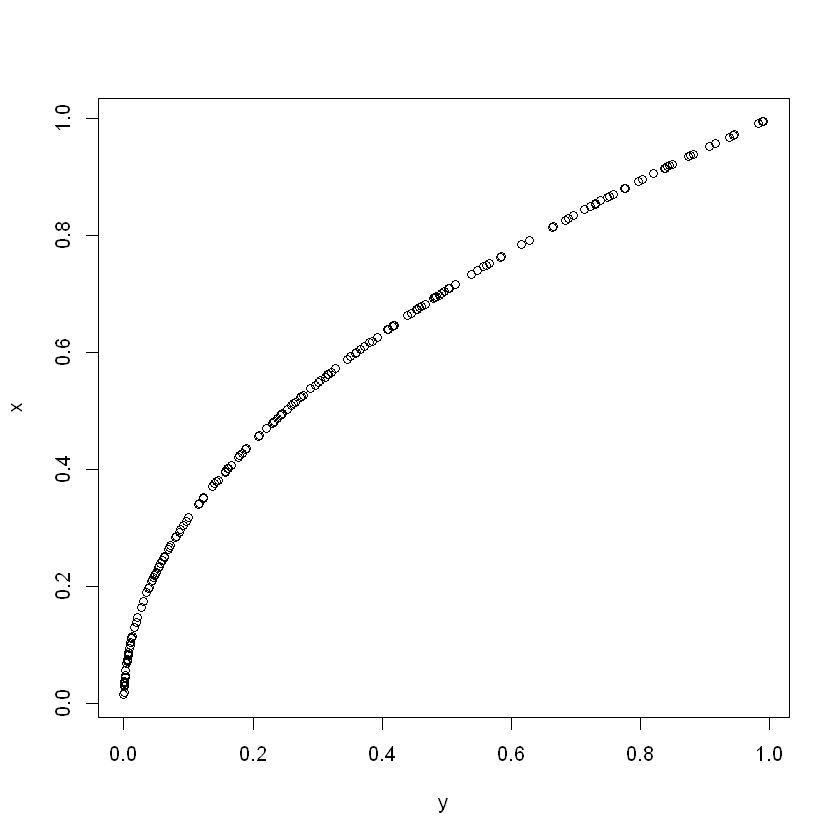

In [8]:
pipeable_plot <- function(data, formula) {
  plot(formula, data)
  # Add a "formula" attribute to data
  attr(data, "formula") <- formula
  invisible(data)
}

# From previous exercise
plt_x_vs_y <- square %>% 
  pipeable_plot(x ~ y)

# Examine the structure of the result
str(plt_x_vs_y)